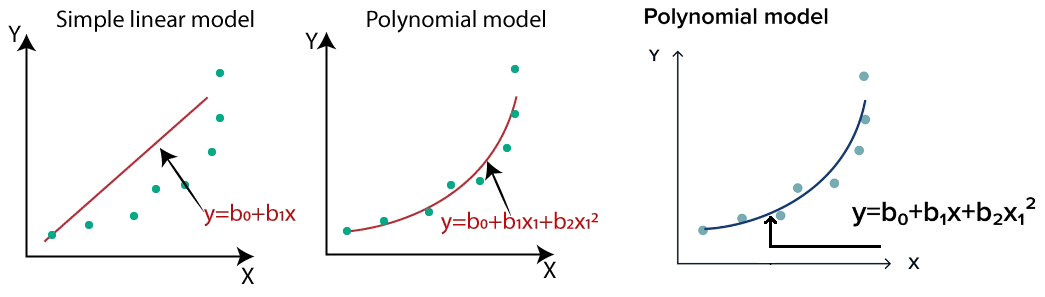

### 1. Data preprocessing.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data_frame = pd.read_csv("Position_Salaries.csv")

X = data_frame.iloc[:, 1:-1].values
y = data_frame.iloc[:, -1].values

print(f"Data frame: \n{data_frame}")
print(f"X: \n{X}")
print(f"y: \n{y}")

Data frame: 
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
X: 
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
y: 
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### 2. Model training (Simple Linear Regression + Polynomial Linear Regression)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [46]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X, y)

print(f"X: \n{X}")

X: 
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [49]:
polynomial_degree = 4

polynomial_regression_features = PolynomialFeatures(degree=polynomial_degree)
X_polynomial = polynomial_regression_features.fit_transform(X, y)

print(f"X_polynomial: \n{X_polynomial}")

linear_regression_model_2 = LinearRegression()
linear_regression_model_2.fit(X_polynomial, y)

X_polynomial: 
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


LinearRegression()

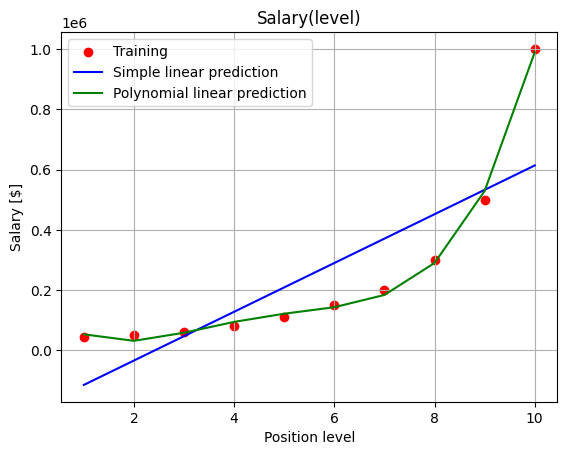

In [61]:
plt.scatter(X, y, color="red")
plt.plot(X, linear_regression_model.predict(X), color="blue")
plt.plot(X, linear_regression_model_2.predict(polynomial_regression_features.fit_transform(X)), color="green")
plt.grid(True)
plt.legend(["Training", "Simple linear prediction", "Polynomial linear prediction"])
plt.xlabel("Position level")
plt.ylabel("Salary [$]")
plt.title("Salary(level)")
plt.savefig("Salary(PositionLevel).jpg")
plt.show()

### 3. Predicting results

In [64]:
y_predicted_simple_linear_regression = linear_regression_model.predict([
    [6.5],
    [6.8],
    [7.2]
])

print(f"Simple linear regression model prediction: \n{y_predicted_simple_linear_regression}")

print("\n")

y_predicted_polynomial_linear_regression = linear_regression_model_2.predict(polynomial_regression_features.fit_transform([
    [6.5],
    [6.8],
    [7.2]
]))

print(f"Polynomial linear regression model prediction: \n{y_predicted_polynomial_linear_regression}")

Simple linear regression model prediction: 
[330378.78787879 354642.42424242 386993.93939394]


Polynomial linear regression model prediction: 
[158862.45265155 172419.15151518 198129.96736599]
